In [1]:
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30
!pip install Pillow

     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 21.8 MB 89.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headless-4.5.4.60


In [2]:
import cv2
import re
import matplotlib.pyplot as plt
import numpy as np
import easyocr
from PIL import Image, ImageDraw
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()


In [25]:
def getText(inputtext):
	pob = inputtext[inputtext.find(r'Place of Birth'):]
	pob = pob.split(",")
	if len(pob) >= 2:
		POB = pob[1]
	else:
		POB = " "
	text=inputtext[inputtext.find(r'P<'):]
	indices = [0, 44]
	lines = [text[index:] for index in indices]
	if len(lines[0]) < 35:
		return ({},0)
	lines[1] = lines[1].replace('\n','')
	if len(lines[1]) < 28:
		return ({},0)
	iss_country = lines[0][2:5]
	# print(iss_country)
	temp = re.findall(r'\w+', lines[0][5:])
	sur_name = fixLetters(temp[0])
	# print(sur_name)
	first_name = fixLetters(temp[1])
	# print(first_name)
	pp_no = removeJunk(lines[1][:9])
	# print(pp_no)
	nat = fixLetters(lines[1][11:14])
	# print(nat)
	dob = fixDigits(lines[1][14:20])
	# print(dob)
	sex = fixLetters(lines[1][21])
	# print(sex)
	exp = fixDigits(lines[1][22:28])
	dic = {
    "Surname" : sur_name,
    "First Name" : first_name,
    "Date Of Birth(YYMMDD)" : dob,
    "Place of Birth": POB,
    "Address":" ",
    "Passport Number" : pp_no,
    "Expiry Date(YYMMDD)" : exp,
		"Nationality" : nat,		
		"Sex" : sex,
		
	}
	return dic

def removeJunk(txt):
	return txt.replace('<','').replace(',','')
def fixDigits(txt):
	data = [('A','-'),('B',8),('C','-'),('D',0),('E',3),('F',7),('G',6),('H',8),('I',1),('J','-'),('K',8),('L','-'),('M','-'),('N','-'),('O',0),('P',9),('Q',2),('R','-'),('S',5),('T',7),('U',0),('V','-'),('W','-'),('X','-'),('Y',5),('Z',2)]
	for t in data:
		txt = txt.replace(t[0], str(t[1]))
	return txt


def fixLetters(txt):
	data = [(0,'O'),(1,'I'),(2,'Z'),(3,'-'),(4,'A'),(5,'S'),(6,'G'),(7,'T'),(8,'B'),(9,'-')]
	for t in data:
		txt = txt.replace(str(t[0]), t[1])
	return txt

def detect_text_blocks(img_path):
    detection_result = reader.detect(img_path,
                                 width_ths=0.7, 
                                 mag_ratio=1.5
                                 )
    text_coordinates = detection_result[0][0]
    return text_coordinates

def draw_bounds(img_path, bbox):
    image = Image.open(img_path)  
    draw = ImageDraw.Draw(image)
    for b in bbox:
        p0, p1, p2, p3 = [b[0], b[2]], [b[1], b[2]], \
                         [b[1], b[3]], [b[0], b[3]]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill='red', width=2)
    return np.asarray(image)



In [8]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

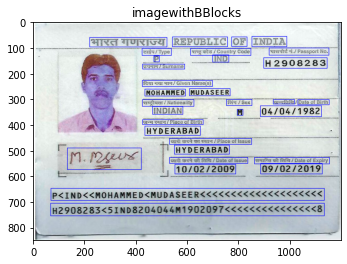

In [29]:
img_path = "/content/sample2.jpg"
text_coordinates = detect_text_blocks(img_path)
text_blocks_in_image = draw_bounds(img_path, text_coordinates)
plt_imshow("imagewithBBlocks",text_blocks_in_image)

In [30]:
recognition_results = reader.recognize(img_path,
                                 horizontal_list=text_coordinates,
                                 free_list=[]
                                 )
detected_text = [txt[1] for txt in recognition_results]
detected_text = ",".join(detected_text)
detected_text

'HRT TUR,REPUBLIC,OF,INDIA,21s4/ Type,ve+3 / Country Code,4r74ie + / Passport No.,p,IND,897N / Surname,H2908283,fa*74/ Given Name(s},MOHAMMED,MUDASEER,FTearaf / Nationality,ffv / Sex,674,Date oi Birth,INDIAN,M,04/04/1982,0r *N/ Place of Birth,HYDERABAD,O *43 €277 / Place 0f Issue,HYDERABAD,n.nLuz,0v70&4 / Date 0} Issue,0aifa:f4 / Dale of Expiry,10/02/2009,09/02/2019,P<IND<<MOHAMMED<MUDASEER<<<<<<<<<<<<<<<<<<<<,H2908283<5Ind8204044m1902097<<<<<<<<<<<<<<<8'

In [31]:
getText(detected_text)

{'Address': ' ',
 'Date Of Birth(YYMMDD)': '820404',
 'Expiry Date(YYMMDD)': '190209',
 'First Name': 'MUDASEER',
 'Nationality': 'Ind',
 'Passport Number': 'H2908283',
 'Place of Birth': 'HYDERABAD',
 'Sex': 'm',
 'Surname': 'MOHAMMED'}